## Twitter Data Analysis
### Gathering the Data

Tweepy is an open source Python package that gives you a very convenient way to access the Twitter API with Python. Tweepy includes a set of classes and methods that represent Twitter's models and API endpoints, and it transparently handles various implementation details, such as: Data encoding and decoding.

TextBlob is a Python (2 and 3) library for processing textual data. It provides a simple API for diving into common natural language processing (NLP) tasks such as part-of-speech tagging, noun phrase extraction, sentiment analysis, classification, translation, and more.


In [1]:
# Import the libraries
import tweepy   #twitter extraction part, not using over here.
from textblob import TextBlob
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Reading the twitter data from CSV file
df = pd.read_csv('tweets.csv')

### Once the data is generated in the dataframe, we will start splitting the textual data with the help of textblob library

ref website:
https://medium.com/nerd-for-tech/what-are-the-different-types-of-sentiment-analysis-808f36ef89ee


https://medium.com/@qudrohbidemi/sentiment-analysis-project-using-textblob-216d3fe119fc

#subjectivity and polarity
Twitter data analysis using subjectivity and polarity helps determine the sentiment and opinion expressed in tweets.



*   Polarity measures sentiment on a scale from -1 (negative) to +1 (positive), indicating whether a tweet is positive, negative, or neutral.
*   Subjectivity ranges from 0 (objective/factual) to 1 (subjective/opinionated), showing how personal or biased a tweet is.


By analyzing these metrics, we can classify tweets, track public sentiment trends, and understand opinions on topics like brands, politics, or events

#Interpretation
High polarity + high subjectivity → Strong personal opinion (e.g., "I love this!")

Negative polarity → Criticism or dissatisfaction (e.g., "This is awful.")

Neutral polarity + low subjectivity → Factual statement (e.g., "It is raining.")

In [3]:
# Create a function to get the subjectivity
def getSubjectivity (text):
    return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity
def getPolarity (text):
    return TextBlob(text).sentiment.polarity

In [4]:
#Create two new columns
df ['Data_Subjectivity'] = df['Tweet_Data'].apply(getSubjectivity)
df['Data_Polarity'] = df['Tweet_Data'].apply(getPolarity)

#Show the new dataframe with the new columns
df

,User,Tweet_Data,Data_Subjectivity,Data_Polarity
0,magicaljulesxo,@swiftiealways22 @MarvelStudios @Marvel @Aveng...,0.650000,0.000000
1,johnerickdgreat,"""I am Iron Man."" - Tony Stark (#IronMan)\n\nIt...",0.600000,-0.250000
2,FunkoPortraits,"Happy 4th Birthday, @Avengers: Infinity War! h...",1.000000,1.000000
3,kai_suva,RT @bettylynfj: Hi @chrishemsworth ⚡️ hope a v...,0.000000,0.000000
4,ArshithBaske,It's been 3 years where we had collectively lo...,0.000000,0.000000
...,...,...,...,...
295,al_turker52,RT @storyteller_nft: Happy Sunday ya'll ❤️ \nS...,0.700000,0.566667
296,VillaGonza3,"@GeekZoneGZ ""Avengers assemble"". That's my fav...",1.000000,0.550000
297,namuhae_,"RT @NASA: Hey @Marvel, we heard about Tony Sta...",0.466667,0.025000
298,YetzerGamer,@msmarvel @Avengers @disneyplus First time on ...,0.333333,0.250000


### Generating sentimental analysis

In [5]:
#Evaluating positive, negative and neutral sentimaental analysis and adding it into the dataframe
def getAnalysis (x):
    if x < 0:
        return 'Negative'
    elif x == 0:
        return 'Neutral'
    else:
        return 'Positive'

In [6]:
# Create a new Column with all conditions which we defined based on that give the output like negative, neutral and positive.
df['Data_Analysis'] = df['Data_Polarity'].apply(getAnalysis)

#Print the Dataframe
df

,User,Tweet_Data,Data_Subjectivity,Data_Polarity,Data_Analysis
0,magicaljulesxo,@swiftiealways22 @MarvelStudios @Marvel @Aveng...,0.650000,0.000000,Neutral
1,johnerickdgreat,"""I am Iron Man."" - Tony Stark (#IronMan)\n\nIt...",0.600000,-0.250000,Negative
2,FunkoPortraits,"Happy 4th Birthday, @Avengers: Infinity War! h...",1.000000,1.000000,Positive
3,kai_suva,RT @bettylynfj: Hi @chrishemsworth ⚡️ hope a v...,0.000000,0.000000,Neutral
4,ArshithBaske,It's been 3 years where we had collectively lo...,0.000000,0.000000,Neutral
...,...,...,...,...,...
295,al_turker52,RT @storyteller_nft: Happy Sunday ya'll ❤️ \nS...,0.700000,0.566667,Positive
296,VillaGonza3,"@GeekZoneGZ ""Avengers assemble"". That's my fav...",1.000000,0.550000,Positive
297,namuhae_,"RT @NASA: Hey @Marvel, we heard about Tony Sta...",0.466667,0.025000,Positive
298,YetzerGamer,@msmarvel @Avengers @disneyplus First time on ...,0.333333,0.250000,Positive


In [9]:
# Gathering all the tweets and print it
j=1

Positive_sortedDF = df.sort_values (by=['Data_Polarity'])

for i in range(0, Positive_sortedDF.shape [0]):
    if(Positive_sortedDF [ 'Data_Analysis'][i] == 'Positive'):
        print (str(j) + ' ) ' + Positive_sortedDF ['Tweet_Data'][i])
        print()
        j = j+1

1 ) Happy 4th Birthday, @Avengers: Infinity War! https://t.co/WuEZHODZWQ

2 ) day 734:daily reminder that i love the avengers (@Avengers) 3000

3 ) Would love to see BTS, extra cuts &amp; other trivia for #AvengersEndgame @Avengers @Marvel @MarvelStudios @Russo_Brothers @TheRealStanLee

4 ) RT @Avengers: Marvel Studios' Thor: Love and Thunder arrives only in theaters July 8. ❤️ + ⚡️ https://t.co/J67uQTXar8

5 ) @magicaljulesxo @MarvelStudios @Marvel @Avengers Best movie!!!

6 ) @Avengers @thorofficial Check out Thor Love And Thunder Marvel Studios Marvel Legends BAF Korg Set-NIB (In Hand) https://t.co/J2KQcbzFJ8 #eBay via @eBay #ThorLoveAndThunder #Thor #MarvelLegends #Marvel #MarvelStudios #MCU #MightyThor #KingValkyrie #RavagerThor #Gorr #Groot #StarLord #Korg #Hasbro

7 ) RT @storyteller_nft: Happy Sunday ya'll ❤️ 
Sometime between Monday and Friday @minitellers going to launch! 
Get ready to fall in love wit…

8 ) RT @Avengers: Marvel Studios' Thor: Love and Thunder arrives only in

In [10]:
# Gathering all the tweets and print it
j=1

Negative_sortedDF = df.sort_values (by=['Data_Polarity'])
for i in range(0, Negative_sortedDF.shape [0]):
    if(Negative_sortedDF [ 'Data_Analysis'][i] == 'Negative'):
        print (str(j) + ' ) ' + Negative_sortedDF ['Tweet_Data'][i])
        print()
        j = j+1

1 ) "I am Iron Man." - Tony Stark (#IronMan)

It's been 3 years since the release of @Avengers: Endgame! 

#AvengersEndgame
#Funko
#FunkoPop
#FunkoPopPH
#FunkoPopCollection https://t.co/UdWtnGVdPv

2 ) @Hulk - That's my secret Captain, I'm always angry.

It's like car always moving with a hand-brake on.

@Avengers 
@PlayAvengers 
@MarkRuffalo 
@CaptainAmerica

3 ) And I’m still crying 😭 @ChrisEvans @Avengers 🙏🏼😭💖 https://t.co/DVbqYC2BB9

4 ) @MarvelStudios @MarvelStudios we have been embracing it ever since #Endgame came followed by other parallels @OscarIsaacFR @Kevfeige @Avengers @Marvel https://t.co/jzm3vgQLeL

5 ) @Jskerry20 I know! It's like it was yesterday! And I dont think it's  a coincidence we lost  @Avengers and then it wasn't even a year before the world went crazy right?! #theavengers#AvengersAssemble #AvengersInfinityWar #KORG #ThorLoveAndThunder #bucky #WandaVision  #wintersoldier

6 ) @GoSoundtracks @MarvelStudios @Challonge @Avengers @theblackpanther @Iron_Man @SpiderM

In [11]:
# Gathering all the tweets and print it
j=1

NeutralsortedDF = df.sort_values (by=['Data_Polarity'])
for i in range(0, NeutralsortedDF.shape [0]):
    if(NeutralsortedDF [ 'Data_Analysis'][i] == 'Neutral'):
        print (str(j) + ' ) ' + NeutralsortedDF ['Tweet_Data'][i])
        print()
        j = j+1

1 ) @swiftiealways22 @MarvelStudios @Marvel @Avengers Yesss!! I get emotional every time I watch this movie! 😭🥺❤️

2 ) RT @bettylynfj: Hi @chrishemsworth ⚡️ hope a visit to Suva is part of your plans since you’re in Fiji 🤞😅 you can beat your @Avengers and ca…

3 ) It's been 3 years where we had collectively lost our mind. This movie will be etched in hearts of every Marvel fan. Hail Marvel !
@Marvel @Avengers https://t.co/KTP1IxAClA

4 ) @Hyundai_NFT @TheRealStanLee @RobertDowneyJr @ladygaga @zoesaldana @SamuelLJackson @Disney @stephenfry @TheEllenShow @Avengers @2AMkwon #Hyundai_NFT #NFT

5 ) @yenlyfans @prophetofopium @rchivedryan @FBI @CIA @NATO @BBCNews @BritishArmy @metpoliceuk @MetPoliceEvents @Avengers @DCSuperman @SpiderMan @Hulk @thorofficial omg????

6 ) @9GAG @MarvelStudios @Avengers HAHAHHSAHAHAHHAHAHAHA BUONG SINEHAN SIGAWAN

7 ) RT @bettylynfj: Hi @chrishemsworth ⚡️ hope a visit to Suva is part of your plans since you’re in Fiji 🤞😅 you can beat your @Avengers and ca…

8 )

### Visualizing the data

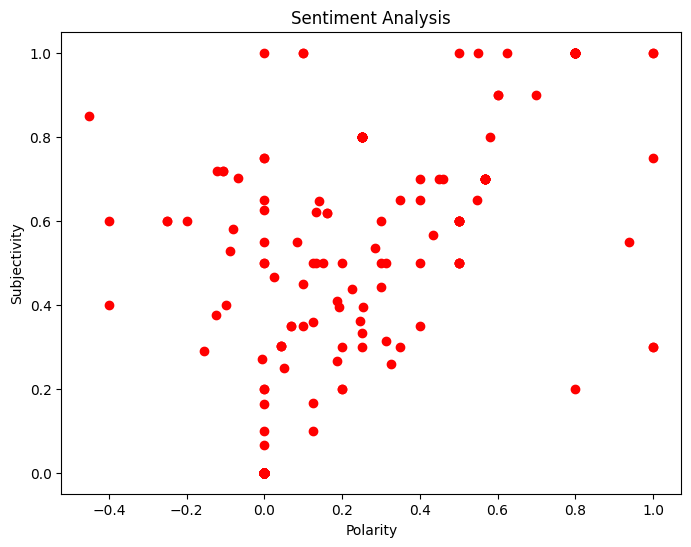

In [12]:
# polarity and subjectivity plotting
# Size of the plot
plt.figure(figsize=(8,6))

for i in range(0, df.shape[0]):
    plt.scatter (df['Data_Polarity'][i], df [ 'Data_Subjectivity'][i], color='Red' )

plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

## Conclusion:

### We conducted sentimental analysis on the following data and discovered that the majority of the comments are either neutral or positive, as seen in the figure above.

#Exercise: implement the wordcloud on given tweets, also plot the column chart for representing the polarities


In [19]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
import re
from nltk.corpus import stopwords

In [20]:
text = " ".join(tweet for tweet in df['Tweet_Data'])
text = re.sub(r'@\w+', '', text)
text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
text = re.sub(r'\W', ' ', text)
text = re.sub(r'\d+', '', text)

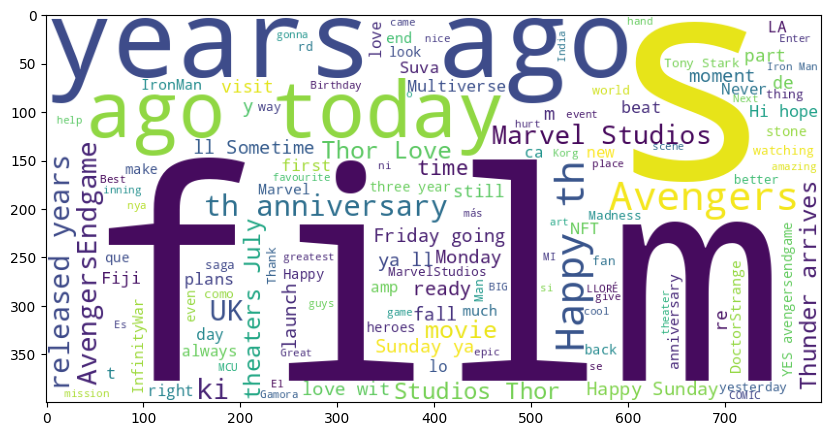

In [24]:
stopwords = set(STOPWORDS)
stopwords.update(["RT", "endgame", "infinity", "war", "one", "will", "see", "get", "got", "via","s"])

wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stopwords,min_font_size=10).generate(text)


plt.figure(figsize=(10, 6), facecolor=None)
plt.imshow(wordcloud)
plt.show()